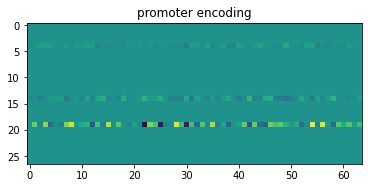

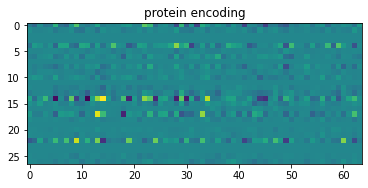

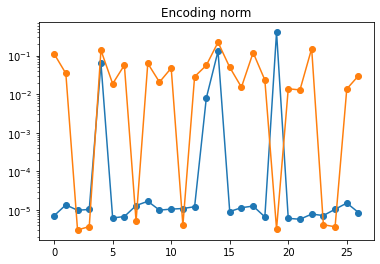

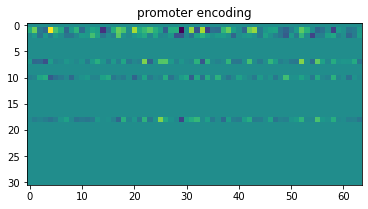

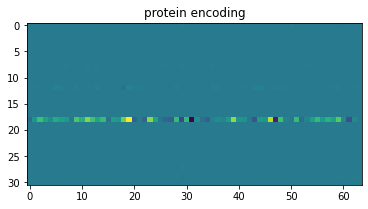

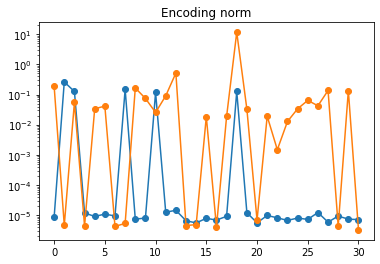

In [3]:
from matplotlib import pyplot as plt
import h5py
import numpy as np


# Loading and demoing the structure of the files

filename = "/mnt/home/sgolkar/projects/cancer-net/data/brain/raw/LGG/TCGA-CS-4942-01A-01D-1468-08.h5"

with h5py.File(filename, "r") as f:

    prom = f["data"]["promoter"][()]
    prot = f["data"]["protein"][()]

plt.imshow(prom)
plt.title("promoter encoding")
plt.show()

plt.imshow(prot)
plt.title("protein encoding")
plt.show()

# Why are some norms so small?
# Perhaps we can drop the genese were the norm is small for both promoter and the protein?
plt.semilogy(np.abs(prom).sum(1), marker="o", label="promoter")
plt.semilogy(np.abs(prot).sum(1), marker="o", label="protein")
plt.title("Encoding norm")
plt.show()


# Another example

filename = "/mnt/home/sgolkar/projects/cancer-net/data/brain/raw/GBM/TCGA-02-0033-01A-01D-1490-08.h5"

with h5py.File(filename, "r") as f:

    prom = f["data"]["promoter"][()]
    prot = f["data"]["protein"][()]

plt.imshow(prom)
plt.title("promoter encoding")
plt.show()

plt.imshow(prot)
plt.title("protein encoding")
plt.show()

plt.semilogy(np.abs(prom).sum(1), marker="o", label="promoter")
plt.semilogy(np.abs(prot).sum(1), marker="o", label="protein")
plt.title("Encoding norm")
plt.show()

Error files: []
Model files: GBM: 393, LGG: 508, other: 0
Num duplicates: 0
Num samples without data: 0

Error files: []
Data files: GBM: 378, LGG: 373, other: 0
Num duplicates: 0
Num samples without data: 1

Num samples in model not in data: 150
Num samples in data not in model: 0


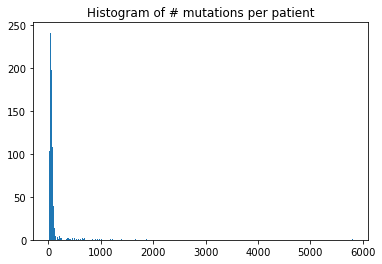

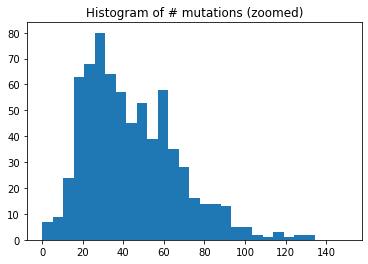

In [4]:
# Looking at the difference between the files under model and under data (Brain data)

# First, looking at the old files files under model folder.

from matplotlib import pyplot as plt
import h5py
import numpy as np
import os
from os.path import isfile, join

dataroot_model = "/mnt/home/sgolkar/projects/cancer/models/CancerGNN-06-01/data/raw"
files_model = [
    join(dataroot_model, f)
    for f in os.listdir(dataroot_model)
    if isfile(join(dataroot_model, f))
]

cancer_types_model = []
error_samples_model = []
sample_IDs_model = []
nodata_model = []
for file in files_model:
    with h5py.File(file, "r") as f:

        try:
            cancer_types_model.append(f["label"]["sample_meta"]["tumor"][()])
            sample_IDs_model.append(f["label"]["sample_id"][()])
            if "data" not in f.keys():
                nodata_model.append(file)
        except:
            error_samples_model.append(file)
        # num_mutations.append(f['meta']['mutated_gene_list'])

# The reference gene file is the only one that errors out
print("Error files:", error_samples_model)

GBM_num_model = np.sum([el == b"GBM" for el in cancer_types_model])
LGG_num_model = np.sum([el == b"LGG" for el in cancer_types_model])
other_num_model = np.sum([el != b"LGG" and el != b"GBM" for el in cancer_types_model])

print(
    "Model files: GBM: {}, LGG: {}, other: {}".format(
        GBM_num_model, LGG_num_model, other_num_model
    )
)
print("Num duplicates: {}".format(len(set(sample_IDs_model)) - len(sample_IDs_model)))
print("Num samples without data: {}\n".format(len(nodata_model)))

# Now looking at files under the mutated genes

datarootGBM = "/mnt/home/sgolkar/projects/cancer-net/data/brain/raw/GBM"
datarootLGG = "/mnt/home/sgolkar/projects/cancer-net/data/brain/raw/LGG"
files_data = [
    join(datarootGBM, f)
    for f in os.listdir(datarootGBM)
    if isfile(join(datarootGBM, f))
]
files_data += [
    join(datarootLGG, f)
    for f in os.listdir(datarootLGG)
    if isfile(join(datarootLGG, f))
]


cancer_types_data = []
num_mutations_data = []
error_samples_data = []
sample_IDs_data = []
nodata_data = []
for file in files_data:
    with h5py.File(file, "r") as f:

        try:
            cancer_types_data.append(f["label"]["sample_meta"]["tumor"][()])
            num_mutations_data.append(len(f["meta"]["mutated_gene_list"][()]))
            sample_IDs_data.append(f["label"]["sample_id"][()])
            if "data" not in f.keys():
                nodata_data.append(file)
        except:
            error_samples_data.append(file)

# The reference gene file is the only one that errors out
print("Error files:", error_samples_data)

GBM_num_data = np.sum([el == b"GBM" for el in cancer_types_data])
LGG_num_data = np.sum([el == b"LGG" for el in cancer_types_data])
other_num_data = np.sum([el != b"LGG" and el != b"GBM" for el in cancer_types_data])

print(
    "Data files: GBM: {}, LGG: {}, other: {}".format(
        GBM_num_data, LGG_num_data, other_num_data
    )
)
print("Num duplicates: {}".format(len(set(sample_IDs_data)) - len(sample_IDs_data)))
print("Num samples without data: {}\n".format(len(nodata_data)))

print(
    "Num samples in model not in data: {}".format(
        len(set(sample_IDs_model).difference(set(sample_IDs_data)))
    )
)
print(
    "Num samples in data not in model: {}".format(
        len(set(sample_IDs_data).difference(set(sample_IDs_model)))
    )
)


plt.hist(num_mutations_data, bins=300);
plt.title('Histogram of # mutations per patient')
plt.show()

plt.hist(num_mutations_data, bins=np.linspace(0,150,30));
plt.title('Histogram of # mutations (zoomed)')
plt.show()

Epoch: 10, Loss: 0.0659, Train Acc: 0.5880
Test Loss: 0.0629, Acc: 0.6520
Epoch: 20, Loss: 0.0437, Train Acc: 0.8060
Test Loss: 0.0543, Acc: 0.7520
Epoch: 30, Loss: 0.029, Train Acc: 0.8940
Test Loss: 0.0631, Acc: 0.7600
Epoch: 40, Loss: 0.0229, Train Acc: 0.9200
Test Loss: 0.0742, Acc: 0.7560
Epoch: 50, Loss: 0.0207, Train Acc: 0.9240
Test Loss: 0.0919, Acc: 0.7400
Epoch: 60, Loss: 0.0153, Train Acc: 0.9480
Test Loss: 0.106, Acc: 0.7440
Epoch: 70, Loss: 0.0147, Train Acc: 0.9600
Test Loss: 0.109, Acc: 0.7440
Epoch: 80, Loss: 0.0152, Train Acc: 0.9520
Test Loss: 0.113, Acc: 0.7440
Epoch: 90, Loss: 0.014, Train Acc: 0.9520
Test Loss: 0.119, Acc: 0.7440
Epoch: 100, Loss: 0.0125, Train Acc: 0.9640
Test Loss: 0.121, Acc: 0.7520


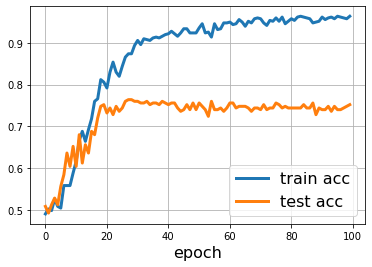

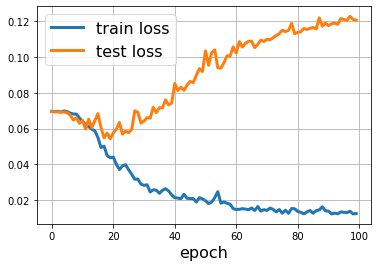

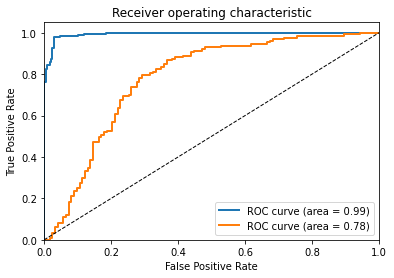

In [5]:
# Training on brain data using GCN architecture

# Hyperparameters etc:

arch = "GCN"
batch = 10
parall = False
lr = 0.005
flag = False # This seems like a debugging flag

import TCGAData
import torch, torch_geometric.transforms as T, torch.nn.functional as F
import matplotlib.pyplot as plt, numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc
from torch_geometric.loader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from arch.net import *

if torch.cuda.is_available():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else:
    device = "cpu"

root = "/mnt/home/sgolkar/projects/cancer-net/data/brain"
files = "/mnt/home/sgolkar/projects/cancer-net/data/brain/samples.txt"
label_mapping = [b"LGG", b"GBM"]
dataset = TCGAData.TCGADataset(
    root=root,
    files=files,
    label_mapping=label_mapping,
    gene_graph="graph/brain.geneSymbol.gz",
)


train_indices = list(range(len(dataset)//3)) + list(range(2*len(dataset)//3, len(dataset)))
test_indices = list(range(len(dataset)//3, 2*len(dataset)//3))
train_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(train_indices),
    drop_last=True,
)
test_loader = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(test_indices),
    drop_last=True,
)

assert len(train_indices) + len(test_indices) == len(dataset), "Train test split with overlap or unused samples!"

model = GCNNet(flag=flag).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = F.nll_loss

def train(epoch, report=True):
    model.train()

    if epoch == 30:
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr * 0.5

    if epoch == 60:
        for param_group in optimizer.param_groups:
            param_group["lr"] = lr * 0.1

    total_loss = 0
    correct = 0
    num_samps = 0
    for data in train_loader:
        if not parall:
            data = data.to(device)
        optimizer.zero_grad()

        output = model(data)
        if flag:
            output = output[0]
        output = output.squeeze()

        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y

        if len(output.shape) == 1:
            output = output.unsqueeze(0)
        loss = criterion(output, y)

        pred = output.max(1)[1]
        correct += pred.eq(y).sum().item()
        total_loss += loss
        loss.backward()
        optimizer.step()
        num_samps += len(y)
    if report:
        print(
            "Epoch: {:02d}, Loss: {:.3g}, Train Acc: {:.4f}".format(
                epoch, total_loss / num_samps, correct / num_samps
            )
        )

    return total_loss / num_samps, correct / num_samps

def test():
    model.eval()
    correct = 0

    total_loss = 0
    num_samps = 0
    for data in test_loader:
        if not parall:
            data = data.to(device)
        output = model(data)
        if flag:
            output = output[0]
        output = output.squeeze()

        pred = output.max(1)[1]
        if parall:
            y = torch.cat([d.y for d in data]).to(output.device)
        else:
            y = data.y
        loss = criterion(output, y)
        total_loss += loss.item()

        correct += pred.eq(y).sum().item()
        num_samps += len(y)
    return total_loss / num_samps, correct / num_samps

train_losses = []
train_acces = []
test_acces = []
test_losses = []
for epoch in range(1, 101):
    # if epoch==15:
    #     import pdb
    #     pdb.set_trace()
    report = (epoch) % 10 == 0
    train_loss, train_acc = train(epoch, report=report)
    test_loss, test_acc = test()
    train_losses.append(train_loss.cpu().detach().numpy())
    test_losses.append(test_loss)
    train_acces.append(train_acc)
    test_acces.append(test_acc)
    if report:
        print("Test Loss: {:.3g}, Acc: {:.4f}".format(test_loss, test_acc))

plt.figure()
plt.plot(train_acces, label="train acc", linewidth=3)
plt.plot(test_acces, label="test acc", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()
plt.plot(train_losses, c="tab:blue", label="train loss", linewidth=3)
plt.plot(test_losses, c="tab:orange", label="test loss", linewidth=3)
plt.legend(prop={"size": 16})
plt.xlabel("epoch", fontsize=16)
plt.grid()
plt.show()

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(train_indices),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)))
    ys.append(tb.y)

outs = torch.cat(outs).cpu().data.numpy()
ys = torch.cat(ys).cpu().data.numpy()

fpr_train, tpr_train, _ = roc_curve(ys, outs[:, 1])
train_auc = auc(fpr_train, tpr_train)

loader_auc = DataLoader(
    dataset,
    batch_size=batch,
    sampler=SubsetRandomSampler(test_indices),
    drop_last=False,
)

outs = []
ys = []
for tb in loader_auc:
    tbc = tb.cuda()
    outs.append(torch.exp(model(tb)))
    ys.append(tb.y)

outs = torch.cat(outs).cpu().data.numpy()
ys = torch.cat(ys).cpu().data.numpy()

fpr_test, tpr_test, _ = roc_curve(ys, outs[:, 1])
test_auc = auc(fpr_test, tpr_test)

plt.plot(
    fpr_train,
    tpr_train,
    lw=2,
    label="ROC curve (area = %0.2f)" % train_auc,
)
plt.plot(
    fpr_test,
    tpr_test,
    lw=2,
    label="ROC curve (area = %0.2f)" % test_auc,
)
plt.plot([0, 1], [0, 1], color="black", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()